<a href="https://colab.research.google.com/github/dev-nanthan/KNN_Classifier/blob/main/MLA1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP6915 - Assignment1 - Team 12

# Question 1

---


**For Given K options Fit the classifier using Euclidean Distance**  

Train kNN classifiers using the Euclidean distance metric and setting k = 1, 3, 5, 10, 20, 30, 50, 100, 150, 200 respectively. Generate classification boundary visualization plots similar to Figure 2 for each of the trained classifiers.
However, your plots should also contain an overlay of the training and test dataset samples colored based on their true
class labels. In the plot title, report the error rates achieved on the training and test datasets respectively. Discuss the
classification performance of the classifiers trained for various “k” values in the context of over(under)fitting, bias and
variance.

### Discussion: 

From the results, we can see that the classification performance of the classifiers trained for various "k" values shows a trend of overfitting. It gradually shifts towards underfitting with increasing values of k. For instance, when k is small (k=1), the model has a high variance and low bias, leading to overfitting. As the value of k increases, the model's variance keeps decreasing, and its bias increasing, leading to underfitting.

The optimal or the best performing model was found to be the one with k=30, which had a training accuracy of 83.12% and a test accuracy of 84%. This indicates that the model's performance was good and successfully generalize well to unseen data. However, the test accuracy does not improve significantly after k=30, and the training accuracy starts to decrease. This could be an indication of overfitting. As we increase the value of k, the model becomes more biased and less complex, leading to underfitting.
Therefore, we need to choose an optimal value of k that balances between bias and variance, leading to a better classification performance. The optimal value of k can be found by performing cross-validation.



### IMPORT Required Packages and Required Train and Test Data

In [188]:
# Enable and Disabel warning as required
# Ignore Warning before Final PDF Generation to make it clean
import warnings
warnings.filterwarnings("ignore")
#warnings.resetwarnings()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/content/drive', force_remount=True)

dir_path = "/content/drive/MyDrive/MAI_MUN/Winter_23/COMP6915-Intro_ML/Assignments/A1/fresh/"
p_train_sNC = dir_path+"train.sNC.csv"
p_train_sDAT = dir_path+"train.sDAT.csv"
p_test_sNC = dir_path+"test.sNC.csv"
p_test_sDAT = dir_path+"test.sDAT.csv"
p_grid = dir_path+"2D_grid_points.csv"

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# use local session files 
# train_sNC = pd.read_csv("train.sNC.csv")
# train_sDAT = pd.read_csv("train.sDAT.csv")
# test_sNC = pd.read_csv("test.sNC.csv")
# test_sDAT = pd.read_csv("test.sDAT.csv")

# Import Files from Drive
# Add Features labels as R1, R2 which stands for Region1, Region2
colnames=['R1', 'R2'] 
train_sNC = pd.read_csv(p_train_sNC, names=colnames, header=None)
train_sDAT = pd.read_csv(p_train_sDAT, names=colnames, header=None)
test_sNC = pd.read_csv(p_test_sNC, names=colnames, header=None)
test_sDAT = pd.read_csv(p_test_sDAT, names=colnames, header=None)
grid_df = pd.read_csv(p_grid, names=colnames, header=None)



### Format Train Data and Test Data: Concat sDAT next to sNC

In [191]:

# Train Data is costructed as Pandas Dataframe objects (2D Datastructure) 
train_data = pd.concat([train_sNC, train_sDAT], ignore_index=True)
print("Train Data Size:", len(train_data))
#print(train_data)
train_labels = np.concatenate([np.zeros(len(train_sNC)), np.ones(len(train_sDAT))])
print("Train Label Size",len(train_labels))
#print(train_labels)

# Test Data is costructed as Pandas Dataframe objects (2D Datastructure) 
test_data = pd.concat([test_sNC, test_sDAT], ignore_index=True)
print("Test Data Size:", len(test_data))
#print(test_data)
test_labels = np.concatenate([np.zeros(len(test_sNC)), np.ones(len(test_sDAT))])
print("Test Label Size",len(test_labels))
#print(test_labels)

Train Data Size: 474
Train Label Size 474
Test Data Size: 200
Test Label Size 200


In [192]:
K_vals = [1,3,5,10,20,30,50,100,150,200]

# Stored Results produced by Each Models using Index of K_vals
results = []
# Stored Eacg models of diff K valuesusing Index of K_vals
KNN = []

for i, k in enumerate(K_vals):
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  KNN.append(knn)
  KNN[i].fit(train_data, train_labels)
  train_accuracy = KNN[i].score(train_data, train_labels)
  test_accuracy = KNN[i].score(test_data, test_labels)

  train_error = 1 - train_accuracy
  test_error = 1 - test_accuracy
  print("k={}, Train accuracy={:.2f}, Test accuracy={:.2f}".format(k, train_accuracy, test_accuracy))
  d_temp = {"K":k, "train_accuracy":train_accuracy, "test_accuracy": test_accuracy,
            "train_error":train_error, "test_error":test_error}
  results.append(d_temp)

# Get the Best Performing K value based on Test_Accuracy
opt_i = 0;
temp_max = 0;
for i, r in enumerate(results):
  if (r["test_accuracy"]>temp_max):
    opt_i = i
    temp_max = r["test_accuracy"]
    #print (r)


print("Optimum Results:", results[opt_i])

OPT_R = results[opt_i]
OPT_K = results[opt_i]["K"]
OPT_Mod = KNN[opt_i]


print("Optimum K:", OPT_K)
print("Optimum Model:", OPT_Mod)


k=1, Train accuracy=1.00, Test accuracy=0.78
k=3, Train accuracy=0.86, Test accuracy=0.80
k=5, Train accuracy=0.84, Test accuracy=0.83
k=10, Train accuracy=0.85, Test accuracy=0.83
k=20, Train accuracy=0.83, Test accuracy=0.83
k=30, Train accuracy=0.83, Test accuracy=0.84
k=50, Train accuracy=0.84, Test accuracy=0.81
k=100, Train accuracy=0.80, Test accuracy=0.80
k=150, Train accuracy=0.81, Test accuracy=0.81
k=200, Train accuracy=0.78, Test accuracy=0.80
Optimum Results: {'K': 30, 'train_accuracy': 0.8312236286919831, 'test_accuracy': 0.84, 'train_error': 0.16877637130801693, 'test_error': 0.16000000000000003}
Optimum K: 30
Optimum Model: KNeighborsClassifier(metric='euclidean', n_neighbors=30)


### Plot the Grid Points and Classify the boundary based on simple given Rule
Sample Label Criteria: `y^ = 0` when `R1<R2`, `y^ = 1` when `R1>=R2`.

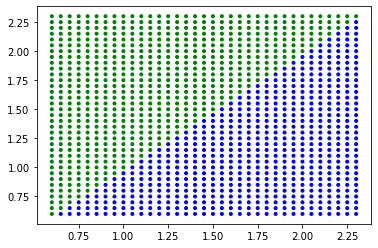

In [193]:
r1 = grid_df['R1']
r2 = grid_df['R2']

# Assign the class labels for the provided Grid points.
# Assign Criteria: y` = 0 when R1<R2, y` = 1 when R1>=R2.
g_y = (r1>r2).astype(int)

# Create scatter plot of grid points with assigned classes
fig, ax = plt.subplots()
colors = ListedColormap(['green', 'blue'])

ax.scatter(r1, r2, c=g_y, cmap=colors, marker='.')

# Draw Contour through the class boundary using meshgrid, Contour - Not Done yet
R1, R2 = np.meshgrid(r1, r2)
Y = (R1>R2).astype(int)
#ax.contour(R1, R2, Y, levels=[0.5], colors='black')

plt.show()


### Plot the Classification Boundary Visualization for the Optimum K 

Marker Rules:
*   Train Data Labels: o
*   Test Data Labels: +

Color Rules:

*   sNC (No Alzheimers) - green
*   sDAT (Alzheimers) - Blue

**Used Libs:**

* `sklearn.neighbors.KNeighborsClassifier.predict(X)`
* `pd.iloc[<row_sel>, <col_sel>])`
* `matplotlib.pyplot.scatter(x, y, c=None, marker=None, cmap=None, vmin=None, vmax=None, alpha=None, **kwargs)`







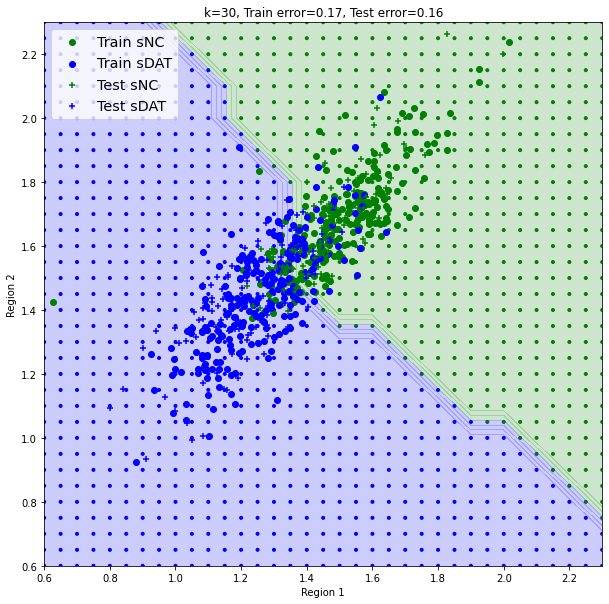

In [194]:
colors = ListedColormap(['green', 'blue'])

# Predict and Plot the Labels for grid points using Optimum model
grid_predictions = OPT_Mod.predict(grid_df)

plt.figure(figsize=(10,10))
plt.scatter(grid_df.iloc[:, 0], grid_df.iloc[:, 1], c=grid_predictions, marker='.', cmap=colors)

# Draw Contour through class boundary
x_min, x_max = grid_df.iloc[:, 0].min(), grid_df.iloc[:, 0].max()+0.1
y_min, y_max = grid_df.iloc[:, 1].min(), grid_df.iloc[:, 1].max()+0.1

# Create the Meshgrid to Crete the Contour Grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Cont_Z = OPT_Mod.predict(np.c_[xx.ravel(), yy.ravel()])
Cont_Z = Cont_Z.reshape(xx.shape)

# Plot the Contour
#plt.contourf(xx, yy, Cont_Z, alpha= 0.3, cmap=plt.cm.GnBu)
plt.contourf(xx, yy, Cont_Z, alpha= 0.2, cmap=colors)

# Plot Train Data Classification
plt.scatter(train_sNC.iloc[:, 0], train_sNC.iloc[:, 1], c='g', marker='o', label='Train sNC')
plt.scatter(train_sDAT.iloc[:, 0], train_sDAT.iloc[:, 1], c='b', marker='o', label='Train sDAT')

# Plot Test Data Classification
plt.scatter(test_sNC.iloc[:, 0], test_sNC.iloc[:, 1], c='g', marker='+', label='Test sNC', edgecolor='white')
plt.scatter(test_sDAT.iloc[:, 0], test_sDAT.iloc[:, 1], c='b', marker='+', label='Test sDAT', edgecolor='white')

# Set Title and Legends
plt.title("k={}, Train error={:.2f}, Test error={:.2f}".format(OPT_K, OPT_R["train_error"], OPT_R["test_error"]))
plt.legend(loc='upper left', fontsize='x-large', fancybox=True)
plt.xlabel('Region 1')
plt.ylabel('Region 2')

#Show the plot
plt.show()

### Sub-Plot the Classification Boundary Visualizations for All the K Values 

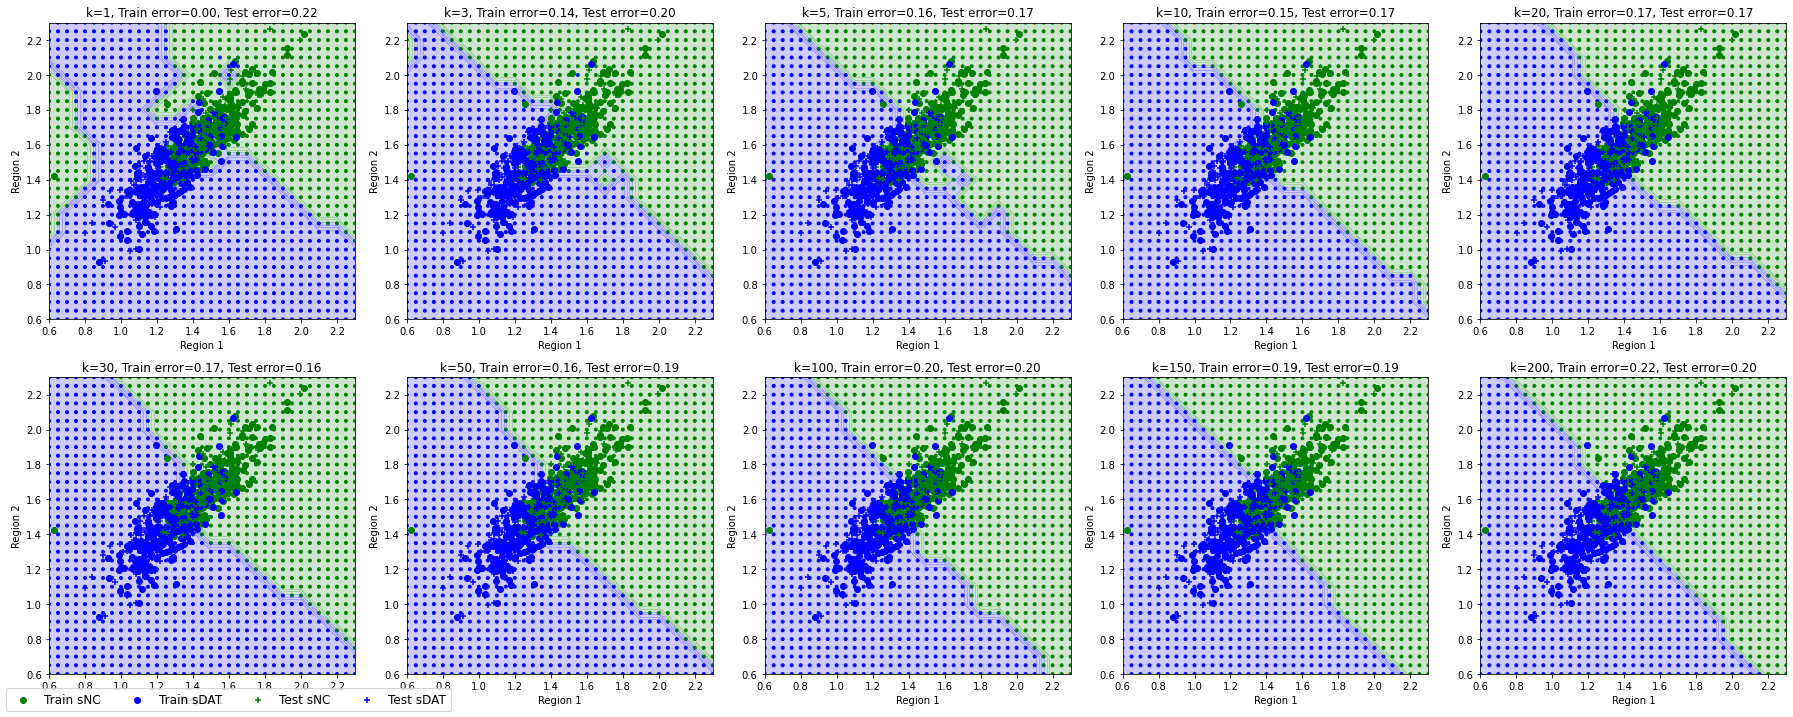

In [195]:
# Globals
K_vals = [1,3,5,10,20,30,50,100,150,200]
colors = ListedColormap(['green', 'blue'])

# Create a subplot grid for each K value
fig1, axes1 = plt.subplots(nrows=2, ncols=5, figsize=(25,10))
p_loc = [[0,0], [0,1], [0,2], [0,3], [0,4], [1,0], [1,1], [1,2], [1,3], [1,4]]

for i, k in enumerate(K_vals):
  # Predict and Plot the Labels for grid points using Optimum model
  grid_predictions = KNN[i].predict(grid_df)
  #print("loc Select:", i, p_loc[i])
  axes1[p_loc[i][0], p_loc[i][1]].scatter(grid_df.iloc[:, 0], grid_df.iloc[:, 1], c=grid_predictions, marker='.', cmap=colors)

  #==============================================================================
  # Draw Contour through class boundary
  x_min, x_max = grid_df.iloc[:, 0].min(), grid_df.iloc[:, 0].max()+0.1
  y_min, y_max = grid_df.iloc[:, 1].min(), grid_df.iloc[:, 1].max()+0.1
  # Create the Meshgrid to Crete the Contour Grid
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
  Cont_Z = KNN[i].predict(np.c_[xx.ravel(), yy.ravel()])
  Cont_Z = Cont_Z.reshape(xx.shape)
  # Plot the Contour
  #plt.contourf(xx, yy, Cont_Z, alpha= 0.3, cmap=plt.cm.GnBu)
  axes1[p_loc[i][0], p_loc[i][1]].contourf(xx, yy, Cont_Z, alpha= 0.2, cmap=colors)

  #==============================================================================
  # Plot Train Data Classification
  axes1[p_loc[i][0], p_loc[i][1]].scatter(train_sNC.iloc[:, 0], train_sNC.iloc[:, 1], c='g', marker='o', label='Train sNC')
  axes1[p_loc[i][0], p_loc[i][1]].scatter(train_sDAT.iloc[:, 0], train_sDAT.iloc[:, 1], c='b', marker='o', label='Train sDAT')

  #==============================================================================
  # Plot Test Data Classification
  axes1[p_loc[i][0], p_loc[i][1]].scatter(test_sNC.iloc[:, 0], test_sNC.iloc[:, 1], c='g', marker='+', label='Test sNC')
  axes1[p_loc[i][0], p_loc[i][1]].scatter(test_sDAT.iloc[:, 0], test_sDAT.iloc[:, 1], c='b', marker='+', label='Test sDAT')

  #==============================================================================
  # Set Title and Legends
  axes1[p_loc[i][0], p_loc[i][1]].set_title("k={}, Train error={:.2f}, Test error={:.2f}".format(k, results[i]["train_error"], results[i]["test_error"]))
  #axes1[p_loc[i][0], p_loc[i][1]].legend(loc='upper left')
  axes1[p_loc[i][0], p_loc[i][1]].set_xlabel('Region 1')
  axes1[p_loc[i][0], p_loc[i][1]].set_ylabel('Region 2')

#==============================================================================
#Show the plot
#fig1.legend(labels=labels, loc="lower center", ncol=4)
handles, labels = axes1[0,0].get_legend_handles_labels()
fig1.legend(handles, labels, loc='lower left', ncol=4, fontsize='large', fancybox=True)

fig1.tight_layout()
plt.show()


# Question 2

---

Select the classifier with the lowest test error rate from the experiment in Question 1. Using the “k” value from
this classifier but changing the distance metric to Manhattan distance, train a new classifier. Again, generate the
visualization plot for the classification boundary with the training and test dataset samples overlaid and colored based
on their true labels. In the plot title report the training and test error rates. Discuss the performance of this classifier in
comparison to the classifier with the lowest test error rate from Question 1.

### Discussion:

Based on the results and the graph, we can see that the performance of the classifier using Manhattan distance is slightly worse than the classifier with the lowest test error rate from Question 1, which used Euclidean distance. The classifier using Manhattan distance has a test error rate of 0.16456, while the classifier with the lowest test error rate in Question 1 had a test error rate of 0.16. 
Additionally, we can observe from the graph plot that the decision boundary is slightly different between the two classifiers. The decision boundary of the classifier using Manhattan distance is more irregular and has more abrupt changes than the decision boundary of the classifier using Euclidean distance. This indicates that the classifier using Euclidean distance may be better at capturing the underlying patterns in the data.

Optimum Model from Q1: KNeighborsClassifier(metric='euclidean', n_neighbors=30)
Optimum K Value:30 of Test Error Rate=0.16000
-------------------------

New Classifier using manhattan distance: KNeighborsClassifier(metric='manhattan', n_neighbors=30)
k=30, Test Error Rate=0.16456
-------------------------



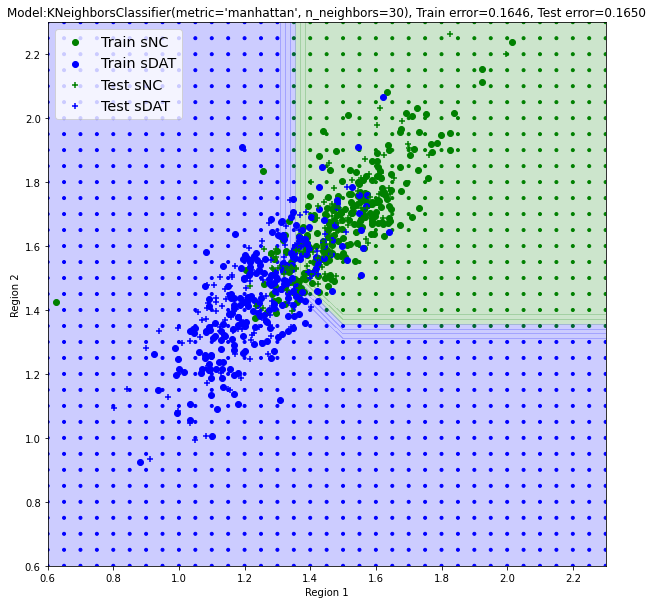

In [196]:
# Print the Optinum Model and the Performance it produced
print("Optimum Model from Q1:", OPT_Mod)
print("Optimum K Value:{} of Test Error Rate={:.5f}".format(results[opt_i]["K"], results[opt_i]["test_error"]))

OPT_K = results[opt_i]["K"]

knn2 = KNeighborsClassifier(n_neighbors=OPT_K, metric='manhattan')
knn2.fit(train_data, train_labels)
train_accuracy2 = knn2.score(train_data, train_labels)
test_accuracy2 = knn2.score(test_data, test_labels)

train_error2 = 1 - train_accuracy2
test_error2 = 1 - test_accuracy2
print("-------------------------\r\n")
print("New Classifier using manhattan distance:",knn2)
print("k={}, Test Error Rate={:.5f}".format(OPT_K, train_error2, test_error2))
print("-------------------------\r\n")

colors = ListedColormap(['green', 'blue'])

# Predict and Plot the Labels for grid points using Optimum model
grid_predictions2 = knn2.predict(grid_df)

plt.figure(figsize=(10,10))

plt.scatter(grid_df.iloc[:, 0], grid_df.iloc[:, 1], c=grid_predictions2, marker='.', cmap=colors)

# Draw Contour through class boundary
x_min, x_max = grid_df.iloc[:, 0].min(), grid_df.iloc[:, 0].max()+0.1
y_min, y_max = grid_df.iloc[:, 1].min(), grid_df.iloc[:, 1].max()+0.1

# Create the Meshgrid to Crete the Contour Grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Cont_Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Cont_Z = Cont_Z.reshape(xx.shape)

# Plot the Contour
plt.contourf(xx, yy, Cont_Z, alpha= 0.2, cmap=colors)

# Plot Train Data Classification
plt.scatter(train_sNC.iloc[:, 0], train_sNC.iloc[:, 1], c='g', marker='o', label='Train sNC')
plt.scatter(train_sDAT.iloc[:, 0], train_sDAT.iloc[:, 1], c='b', marker='o', label='Train sDAT')

# Plot Test Data Classification
plt.scatter(test_sNC.iloc[:, 0], test_sNC.iloc[:, 1], c='g', marker='+', label='Test sNC')
plt.scatter(test_sDAT.iloc[:, 0], test_sDAT.iloc[:, 1], c='b', marker='+', label='Test sDAT')

# Set Title and Legends
plt.title("Model:{}, Train error={:.4f}, Test error={:.4f}".format(knn2, train_error2, test_error2))
plt.legend(loc='upper left', fontsize='x-large', fancybox=True)
plt.xlabel('Region 1')
plt.ylabel('Region 2')

#Show the plot
plt.show()


# Question 3
Based on the experiments in Question 1 and Question 2, select the distance metric (i.e., Euclidean or Manhattan) that
leads to a lower test error rate. Using this chosen distance metric generate the “Error rate versus Model capacity”
plot discussed in Lecture 4, Slide 3. As shown in that plot, parameterize “Model capacity” as “k1 ” and explore the
parameter space from “0.01” to “1.00”. The “x-axis” must be plotted using the “log-scale” and the training and test
rate error curves shown. You need not plot the Bayes Classifier error line (is it possible to plot this using only the
information you have?). Discuss the trend of the training and test error rate curves in the context of model capacity,
bias and variance. Comment on the over(under)fitting zones in the plot.

### **Discussion:** 

From the outputs of Question1 and Question2 its evident that **Euclidean distance performs better** on the provided dataset and the classifier selection.

**Euclidean distance**, performs well when the data features are continuous and have comparable scales. It calculates the shortest path between any two points in a multidimensional space, and it emphasises variations in feature values that are significant in size.


The **Manhattan distance**, on the other hand, quantifies the separation between two sites as the total of the absolute differences of their coordinates along each dimension. When data features are discrete or categorical, or when the features have distinct scales, this distance metric is frequently employed.


The plot shows the trend of training and test error rates with respect to the model capacity (1/k). The trend of the training and test error rates with respect to the model capacity can be explained in terms of bias and variance. As the model capacity increases, the training error rate decreases and the test error rate initially decreases. However, it starts to increase soon after. The point where the test error rate starts increasing is the overfitting zone, and the point where the training error rate is high is the underfitting zone. In the overfitting zone, the model becomes too complex and starts fitting the noise in the training data, resulting in poor performance on the test data. In contrast, in the underfitting zone, the model is too simple resulting in high bias as it fails to capture the underlying pattern.


At low model capacity (high values of k), the model is too simple, and both the training and test error rates are high. This indicates high bias in the model, and underfitting, as it cannot capture the underlying pattern in the data. As the model capacity increases (low values of k), the model becomes more complex and can capture more complex patterns in the data, resulting in a decrease in the training error rate. However, if the model becomes too complex, it starts to fit the noise in the training data, resulting in high variance and an increase in the test error rate- indicating overfitting.


The optimal model capacity is the one that strikes a balance between bias and variance and achieves the lowest test error rate. In the given plot, the optimal model capacity is around 1/k = 0.002, which corresponds to k = 500.

In [197]:
# Function to plot the Capacity vs Error plot for given K_vals and Error Data
def plot_cap_err(K_vals, res, title):
  # Create Reciprocal of the K-Values
  reciprocal_k = [1/x for x in K_vals]

  # Invert the order of (1/K) Values
  inv_reciprocal_k = np.flip(reciprocal_k)

  # Round off every (1/K) values to 3 dec places
  inv_reciprocal_k = [round(x,3) for x in inv_reciprocal_k]

  #Create errors from given results
  train_e_lst = []
  test_e_lst  = []
  for r in res:
    train_e_lst.append(round(r["train_error"],3))
    test_e_lst.append(round(r["test_error"],3))

  # Invert the Error Ratest to Match the order of (1/K) Values
  train_e_lst = np.flip(train_e_lst)
  test_e_lst = np.flip(test_e_lst)

  fig, ax = plt.subplots(figsize=(12,8))
  ax.semilogx(inv_reciprocal_k, train_e_lst, label='Training error')
  ax.semilogx(inv_reciprocal_k, test_e_lst, label='Test error')

  ax.set_title(title)
  ax.set_xlabel('Model capacity (1/k)')
  ax.set_ylabel('Error rate')
  ax.set_xticks(inv_reciprocal_k, inv_reciprocal_k, size = 8)

  for i, j in zip(inv_reciprocal_k, test_e_lst):
      ax.text(i, j, str(j), c= 'red')

  for i, j in zip(inv_reciprocal_k, train_e_lst):
      ax.text(i, j, str(j), c= 'blue')

  ax.legend(loc='lower left', fontsize='x-large', fancybox=True)
  ax.grid(True, which="both")
  plt.show()

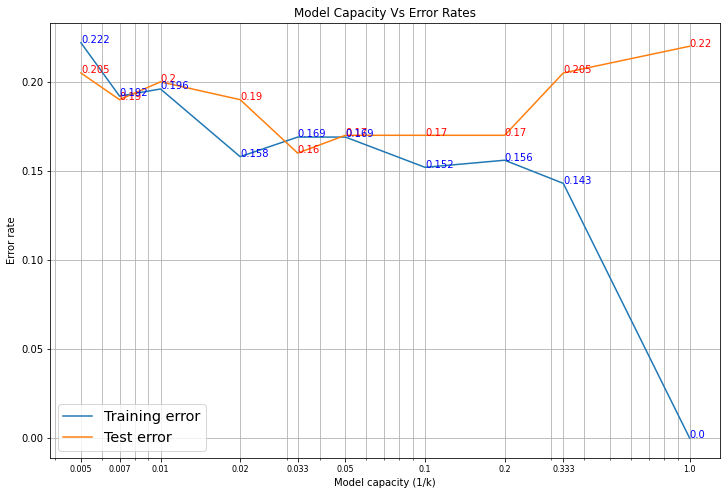

In [180]:
K_vals = [1,3,5,10,20,30,50,100,150,200]

# plot the graph for results generated in Q1 
plot_cap_err(K_vals, results, "Model Capacity Vs Error Rates")

# Question 4

Leveraging the experience you gained from the experiments thus far and/or conducting further experiments based on
the “kNN improvement strategies” discussed in Lecture 4, Slide 6, design the “best” kNN classifier for discriminating
between the sNC and sDAT groups using the glucose metabolism features derived from the two brain regions. You
may also employ any other strategies that we have not discussed yet to train this “best” kNN classifier. The only
restriction is that, you may not use datasets other than the ones provided as part of this assignment.



### Discussion:
From the outputs of Question1 and Question2 on given datasets its evident that:

1.   Euclidean distance performs better
2.   Best K value with lowest Error Rate is: 30

### Improvement Strategy Implemented: Noise Removal


*   **Remove the Mis-Classified Training Data Samples**
*    Factors Considered to decide as Noise Sample:
    1. Mis classified training data found using Predict on training data.
    2. Distance of the miss classified data to its neighbors. 




## **Final Code to Test the Model**

In [203]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# function to pass the final x_test data and data dir
#The function consist of the "best trained model"
def diagnoseDAT(Xtest, data_dir):
  
  # Import the Files and Structure as required
  #=============================================================================
  p_train_sNC = data_dir+"train.sNC.csv"
  p_train_sDAT = data_dir+"train.sDAT.csv"
  p_test_sNC = data_dir+"test.sNC.csv"
  p_test_sDAT = data_dir+"test.sDAT.csv"
  p_grid = data_dir+"2D_grid_points.csv"

  colnames=['R1', 'R2'] 
  train_sNC = pd.read_csv(p_train_sNC, names=colnames, header=None)
  train_sDAT = pd.read_csv(p_train_sDAT, names=colnames, header=None)
  test_sNC = pd.read_csv(p_test_sNC, names=colnames, header=None)
  test_sDAT = pd.read_csv(p_test_sDAT, names=colnames, header=None)
  grid_df = pd.read_csv(p_grid, names=colnames, header=None)

  # Convert the passed Array into labelled dataframe
  x_test_df = pd.DataFrame(data=Xtest, columns=colnames)
  #print(x_test_df)

  # Structure the Train Data and Test Data
  train_data = pd.concat([train_sNC, train_sDAT], ignore_index=True)
  train_labels = np.concatenate([np.zeros(len(train_sNC)), np.ones(len(train_sDAT))])
  test_data = pd.concat([test_sNC, test_sDAT], ignore_index=True)
  test_labels = np.concatenate([np.zeros(len(test_sNC)), np.ones(len(test_sDAT))])

  # Train the model with unfiltered Data with Opt_K val and euclidean metrics
  #=============================================================================
  K_opt  = 30
  knn_opt = KNeighborsClassifier(n_neighbors=K_opt, metric='euclidean')
  knn_opt.fit(train_data, train_labels)
  # Accuracy
  train_acc_opt = knn_opt.score(train_data, train_labels)
  test_acc_opt = knn_opt.score(test_data, test_labels)
  # Error Rate
  train_err_opt = 1-train_acc_opt
  test_err_opt = 1-test_acc_opt

  print("Test Error for Unfiltered Train Data:{}, Model={}".format(test_err_opt, knn_opt))

  # Using the Optimum model trained before, Predict the Trained Samples again
  re_evl_train = knn_opt.predict(train_data)

  # Filter out the Mis classified Training Data Samples
  #=============================================================================
  # Factors Considered to decide as Noise Sample:
  # 1. miss classified training data
  # 2. Distance of the miss classified data to its neighbors

  # kneighbors() --> Returns distance to each neighbor and the index of the neighbor.
  dist, indx = knn_opt.kneighbors(train_data)
  #print(dist[:10])

  # The distance of first neighbor of K neighbors is "zero" because its the same training sample itself
  # So dont consider the first neighbor distance
  useful_dist = dist[:,1:]

  # Median distance to neighbors
  med_dist = np.median(useful_dist)
  print("median dist:", med_dist)

  # Average distance to neighbors
  avg_dist = np.average(useful_dist)
  print("Average dist:", avg_dist)

  # Set the Threshold for Distance
  threshold = med_dist*2
  #threshold = avg_dist
  print("Threshold Set:", threshold)

  # Get the Mask for all the neighbors far away from threshold distance
  far_neigh = useful_dist > threshold

  # if All of the neighbor is beyond threshold then assume as far neighbor
  #far_neigh_fin = np.all(far_neigh, axis=1)

  # if any of the neighbor is beyond threshold then assume as far neighbor
  far_neigh_fin = np.any(far_neigh, axis=1)

  # Identify misclassified noise samples based on prediction mismatch and distance Thresholding
  misclassified_noise = np.logical_and(train_labels != re_evl_train, far_neigh_fin)

  # Remove misclassified noise samples from the training data
  train_data_filtered = train_data[~misclassified_noise]
  train_label_filtered = train_labels[~misclassified_noise]

  print("Size of un-filtered Data:", len(train_data), len(train_labels))
  print("Size of filtered Data:", len(train_data_filtered), len(train_label_filtered))

  # Find the New Best Model with Filtered Training Data 
  #=============================================================================

  #Gievn K Values
  K_vals = [1,3,5,10,20,30,50,100,150,200]
  res_imp = []
  KNN_imp = []

  for i, k in enumerate(K_vals):
    knn_improved = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_improved.fit(train_data_filtered, train_label_filtered)
    KNN_imp.append(knn_improved)
    train_acc_imp = knn_improved.score(train_data_filtered, train_label_filtered)
    test_acc_imp =knn_improved.score(test_data, test_labels)

    train_err_imp = 1 - train_acc_imp
    test_err_imp = 1 - test_acc_imp

    #print("k={}, Improved Train accuracy={:.5f}, Test accuracy={:.5f}".format(k, train_err_imp, test_err_imp))
    d_temp = {"K":k, "train_accuracy":train_acc_imp, "test_accuracy": test_acc_imp,
              "train_error":train_err_imp, "test_error":test_err_imp}
    res_imp.append(d_temp)

  plot_cap_err(K_vals, res_imp, "Capacity vs Error Rates with Improved Training samples")

  # Get the Best Performing K value based on Test_Accuracy
  opt_i = 0;
  temp_max = 0;
  for i, r in enumerate(res_imp):
    if (r["test_accuracy"]>temp_max):
      opt_i = i
      temp_max = r["test_accuracy"]

  print("Improved Model with Filtered Training Data:", KNN_imp[opt_i])
  print("Improved Results:", res_imp[opt_i])

  # Predict the Labels for the X_Test_Samples
  #=============================================================================
  Y_TEST = KNN_imp[opt_i].predict(x_test_df)
  return Y_TEST

# Function to plot the Capacity vs Error plot for given K_vals and Error Data
def plot_cap_err(K_vals, res, title):
  # Create Reciprocal of the K-Values
  reciprocal_k = [1/x for x in K_vals]

  # Invert the order of (1/K) Values
  inv_reciprocal_k = np.flip(reciprocal_k)

  # Round off every (1/K) values to 3 dec places
  inv_reciprocal_k = [round(x,3) for x in inv_reciprocal_k]

  #Create errors from given results
  train_e_lst = []
  test_e_lst  = []
  for r in res:
    train_e_lst.append(round(r["train_error"],3))
    test_e_lst.append(round(r["test_error"],3))

  # Invert the Error Ratest to Match the order of (1/K) Values
  train_e_lst = np.flip(train_e_lst)
  test_e_lst = np.flip(test_e_lst)

  fig, ax = plt.subplots(figsize=(10,6))
  ax.semilogx(inv_reciprocal_k, train_e_lst, label='Training error')
  ax.semilogx(inv_reciprocal_k, test_e_lst, label='Test error')

  ax.set_title(title)
  ax.set_xlabel('Model capacity (1/k)')
  ax.set_ylabel('Error rate')
  ax.set_xticks(inv_reciprocal_k, inv_reciprocal_k, size = 8)

  for i, j in zip(inv_reciprocal_k, test_e_lst):
      ax.text(i, j, str(j), c= 'red')

  for i, j in zip(inv_reciprocal_k, train_e_lst):
      ax.text(i, j, str(j), c= 'blue')

  ax.legend(loc='lower left', fontsize='x-large', fancybox=True)
  ax.grid(True, which="both")
  plt.show()

Test Error for Unfiltered Train Data:0.16000000000000003, Model=KNeighborsClassifier(metric='euclidean', n_neighbors=30)
median dist: 0.048259109397255424
Average dist: 0.05952612457719908
Threshold Set: 0.09651821879451085
Size of un-filtered Data: 474 474
Size of filtered Data: 466 466


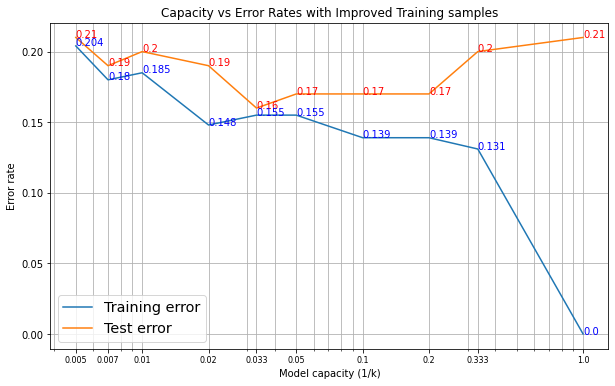

Improved Model with Filtered Training Data: KNeighborsClassifier(metric='euclidean', n_neighbors=30)
Improved Results: {'K': 30, 'train_accuracy': 0.8454935622317596, 'test_accuracy': 0.84, 'train_error': 0.15450643776824036, 'test_error': 0.16000000000000003}
[0. 1. 0. 0.]


In [204]:
# Example Test Final Diagnosis function

# Sample test X_test Matrix
Xtest = [[1.387778156, 1.707818675],[1.172205006, 1.261785803], [1.442681903, 1.738625068], [1.403851791, 1.513975726]]
data_dir = "/content/drive/MyDrive/MAI_MUN/Winter_23/COMP6915-Intro_ML/Assignments/A1/fresh/"

ytest = diagnoseDAT(Xtest, data_dir)
print(ytest)